<a href="https://colab.research.google.com/github/terrytaylorbonn/Gitflow/blob/main/model_training_0919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("hello")

hello


In [2]:
import numpy as np
import torch
import tensorflow as tf


In [5]:
import pandas as pd

In [6]:
import numpy as np
pd.set_option('display.max_columns', None)

In [16]:
from google.colab import files
flights = files.upload()


Saving flights3.csv to flights3 (3).csv


In [19]:
flights = pd.read_csv('flights3.csv')

In [20]:
flights.shape


(9891, 31)

In [21]:
flights


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,2015,1,1,4,B6,400,N645JB,MSY,BOS,1700,1725.0,25.0,11.0,1736.0,184,175.0,159.0,1368,2115.0,5.0,2104,2120.0,16.0,0,0,NaN,0.0,0.0,0.0,16.0,0.0
9887,2015,1,1,4,B6,1436,N659JB,LGB,SFO,1700,1659.0,-1.0,15.0,1714.0,82,96.0,76.0,354,1830.0,5.0,1822,1835.0,13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9888,2015,1,1,4,B6,1779,N527JB,LAS,LGB,1700,1654.0,-6.0,12.0,1706.0,63,53.0,38.0,231,1744.0,3.0,1803,1747.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9889,2015,1,1,4,DL,667,N935AT,AVL,ATL,1700,1654.0,-6.0,9.0,1703.0,68,46.0,32.0,164,1735.0,5.0,1808,1740.0,-28.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
flights.head(3)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
flights.columns


Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [26]:
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

In [27]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,2015,1,1,4,B6,MSY,BOS,1700,1725.0,25.0,2104,2120.0,16.0,0,NaN,0.0,0.0,0.0,16.0,0.0
9887,2015,1,1,4,B6,LGB,SFO,1700,1659.0,-1.0,1822,1835.0,13.0,0,NaN,NaN,NaN,NaN,NaN,NaN
9888,2015,1,1,4,B6,LAS,LGB,1700,1654.0,-6.0,1803,1747.0,-16.0,0,NaN,NaN,NaN,NaN,NaN,NaN
9889,2015,1,1,4,DL,AVL,ATL,1700,1654.0,-6.0,1808,1740.0,-28.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
flights.isna().sum()

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME          386
DEPARTURE_DELAY         386
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME            393
ARRIVAL_DELAY           405
CANCELLED                 0
CANCELLATION_REASON    9501
AIR_SYSTEM_DELAY       8192
SECURITY_DELAY         8192
AIRLINE_DELAY          8192
LATE_AIRCRAFT_DELAY    8192
WEATHER_DELAY          8192
dtype: int64

In [29]:
flights[flights['ARRIVAL_DELAY'].isna()]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
32,2015,1,1,4,AS,ANC,SEA,135,NaN,NaN,600,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
42,2015,1,1,4,AA,PHX,DFW,200,NaN,NaN,500,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
68,2015,1,1,4,OO,MAF,IAH,510,NaN,NaN,637,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
82,2015,1,1,4,MQ,SGF,DFW,525,NaN,NaN,700,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
90,2015,1,1,4,OO,RDD,SFO,530,NaN,NaN,700,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,2015,1,1,4,OO,PUB,DEN,1653,NaN,NaN,1741,NaN,NaN,1,C,NaN,NaN,NaN,NaN,NaN
9767,2015,1,1,4,OO,ASE,IAH,1654,NaN,NaN,2025,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
9812,2015,1,1,4,MQ,DFW,SJT,1655,NaN,NaN,1748,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
9827,2015,1,1,4,OO,DEN,FAR,1658,NaN,NaN,1948,NaN,NaN,1,C,NaN,NaN,NaN,NaN,NaN


In [30]:
na_values = flights[flights['AIR_SYSTEM_DELAY'].isna() & flights['SECURITY_DELAY'].isna() & flights['AIRLINE_DELAY'].isna() & flights['LATE_AIRCRAFT_DELAY'].isna() & flights['WEATHER_DELAY'].isna()]
na_values.shape

(8192, 20)

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>,
        <Axes: title={'center': 'SCHEDULED_ARRIVAL'}>],
       [<Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'CANCELLED'}>,
        <Axes: title={'center': 'AIR_SYSTEM_DELAY'}>],
       [<Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'AIRLINE_DELAY'}>,
        <Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>]], dtype=object)

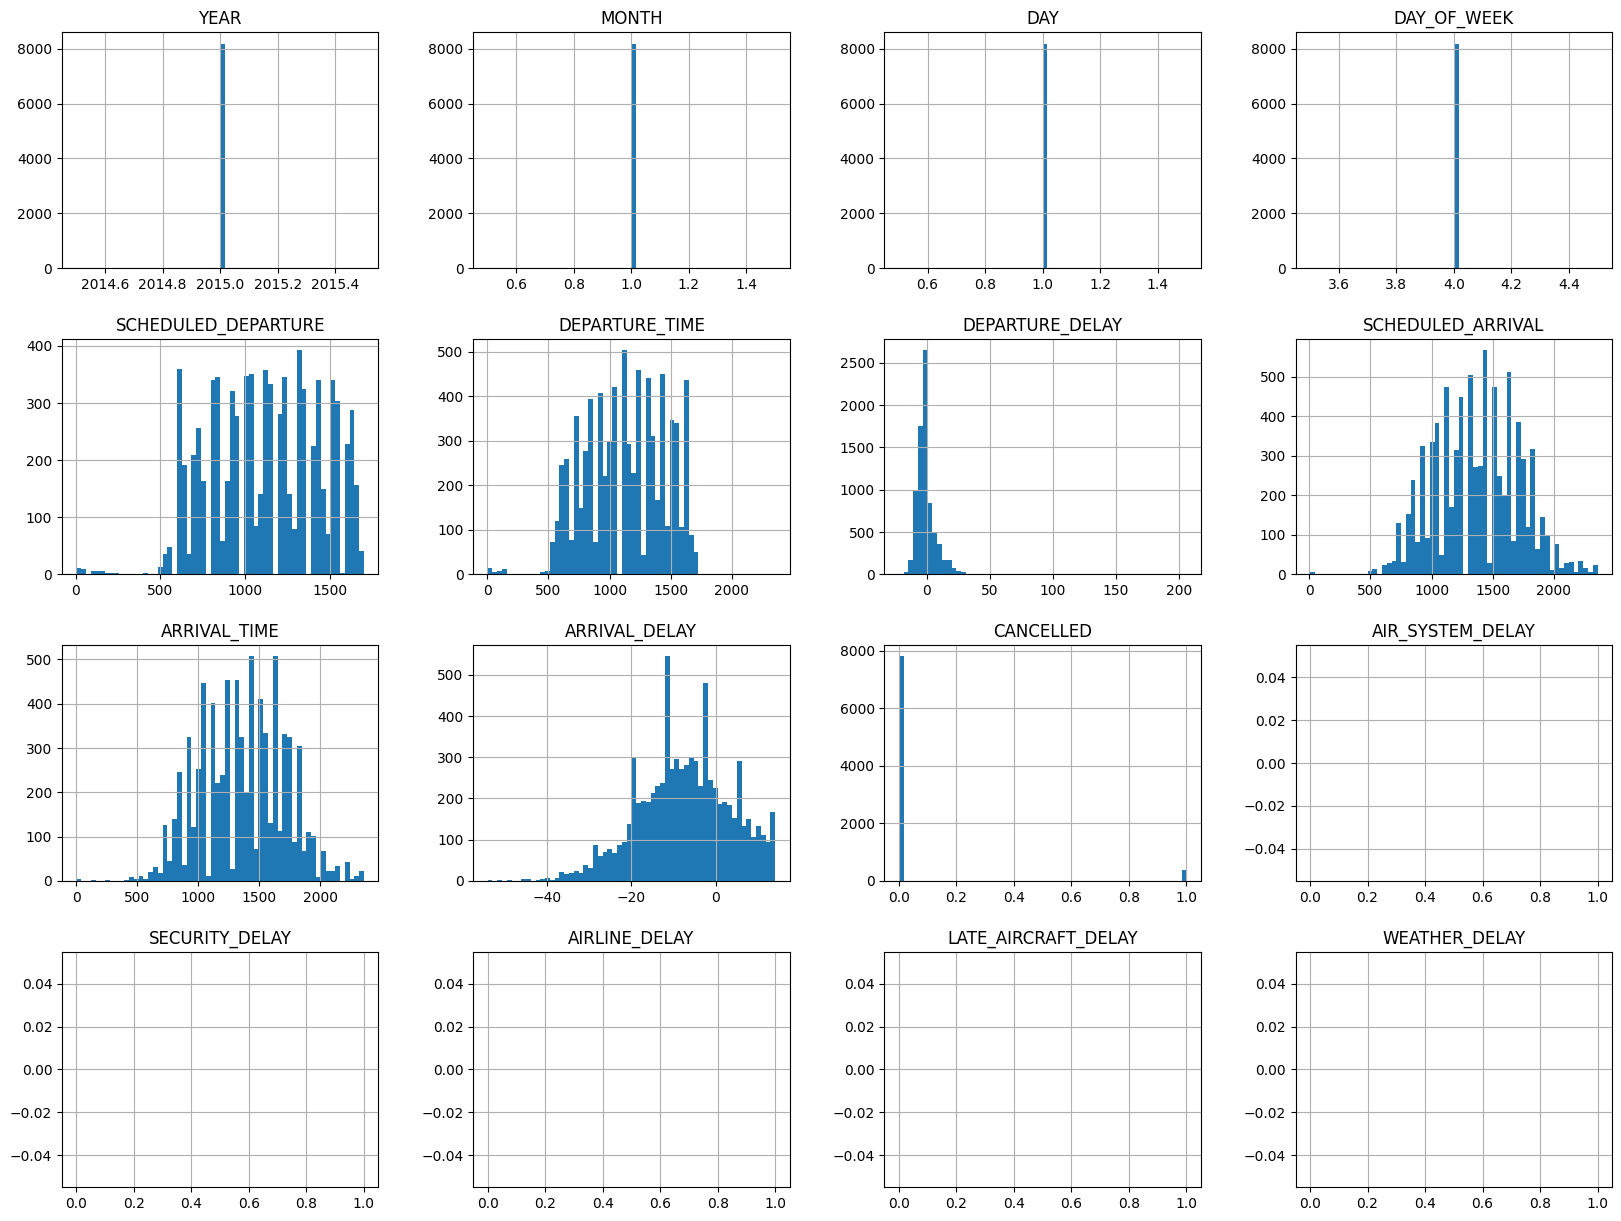

In [31]:
na_values.hist(bins=60, figsize=(20,15))

In [39]:
na_values[na_values['ARRIVAL_DELAY']>10]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
39,2015,1,1,4,B6,SJU,JFK,155,153.0,-2.0,450,501.0,11.0,0,NaN,NaN,NaN,NaN,NaN,NaN
63,2015,1,1,4,UA,ORD,IAH,510,514.0,4.0,805,816.0,11.0,0,NaN,NaN,NaN,NaN,NaN,NaN
72,2015,1,1,4,EV,MKE,IAH,515,517.0,2.0,813,826.0,13.0,0,NaN,NaN,NaN,NaN,NaN,NaN
91,2015,1,1,4,OO,EUG,DEN,530,526.0,-4.0,913,926.0,13.0,0,NaN,NaN,NaN,NaN,NaN,NaN
94,2015,1,1,4,UA,IAD,IAH,535,541.0,6.0,802,816.0,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9780,2015,1,1,4,WN,LGA,DEN,1655,1651.0,-4.0,1945,1957.0,12.0,0,NaN,NaN,NaN,NaN,NaN,NaN
9834,2015,1,1,4,HA,KOA,HNL,1659,1709.0,10.0,1743,1754.0,11.0,0,NaN,NaN,NaN,NaN,NaN,NaN
9845,2015,1,1,4,UA,EWR,ORD,1700,1725.0,25.0,1845,1856.0,11.0,0,NaN,NaN,NaN,NaN,NaN,NaN
9875,2015,1,1,4,AA,PHL,DFW,1700,1700.0,0.0,1955,2009.0,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
arrival_na = flights[flights['ARRIVAL_DELAY'].isna()]
arrival_na

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
32,2015,1,1,4,AS,ANC,SEA,135,NaN,NaN,600,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
42,2015,1,1,4,AA,PHX,DFW,200,NaN,NaN,500,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
68,2015,1,1,4,OO,MAF,IAH,510,NaN,NaN,637,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
82,2015,1,1,4,MQ,SGF,DFW,525,NaN,NaN,700,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
90,2015,1,1,4,OO,RDD,SFO,530,NaN,NaN,700,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,2015,1,1,4,OO,PUB,DEN,1653,NaN,NaN,1741,NaN,NaN,1,C,NaN,NaN,NaN,NaN,NaN
9767,2015,1,1,4,OO,ASE,IAH,1654,NaN,NaN,2025,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
9812,2015,1,1,4,MQ,DFW,SJT,1655,NaN,NaN,1748,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
9827,2015,1,1,4,OO,DEN,FAR,1658,NaN,NaN,1948,NaN,NaN,1,C,NaN,NaN,NaN,NaN,NaN


In [41]:
arrival_na['CANCELLED'].value_counts()

1    390
0     15
Name: CANCELLED, dtype: int64

In [42]:
flights = flights[~flights['ARRIVAL_DELAY'].isna()]
flights.shape

(9486, 20)

In [43]:
flights.isna().sum()

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME            0
DEPARTURE_DELAY           0
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME              0
ARRIVAL_DELAY             0
CANCELLED                 0
CANCELLATION_REASON    9486
AIR_SYSTEM_DELAY       7787
SECURITY_DELAY         7787
AIRLINE_DELAY          7787
LATE_AIRCRAFT_DELAY    7787
WEATHER_DELAY          7787
dtype: int64

In [45]:
flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']] = flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].fillna(0)
flights

<ipython-input-45-12dc74091770>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,0,NaN,0.0,0.0,0.0,0.0,0.0
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,0,NaN,0.0,0.0,0.0,0.0,0.0
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,0,NaN,0.0,0.0,0.0,0.0,0.0
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,0,NaN,0.0,0.0,0.0,0.0,0.0
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,2015,1,1,4,B6,MSY,BOS,1700,1725.0,25.0,2104,2120.0,16.0,0,NaN,0.0,0.0,0.0,16.0,0.0
9887,2015,1,1,4,B6,LGB,SFO,1700,1659.0,-1.0,1822,1835.0,13.0,0,NaN,0.0,0.0,0.0,0.0,0.0
9888,2015,1,1,4,B6,LAS,LGB,1700,1654.0,-6.0,1803,1747.0,-16.0,0,NaN,0.0,0.0,0.0,0.0,0.0
9889,2015,1,1,4,DL,AVL,ATL,1700,1654.0,-6.0,1808,1740.0,-28.0,0,NaN,0.0,0.0,0.0,0.0,0.0


array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>,
        <Axes: title={'center': 'SCHEDULED_ARRIVAL'}>],
       [<Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'CANCELLED'}>,
        <Axes: title={'center': 'AIR_SYSTEM_DELAY'}>],
       [<Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'AIRLINE_DELAY'}>,
        <Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>]], dtype=object)

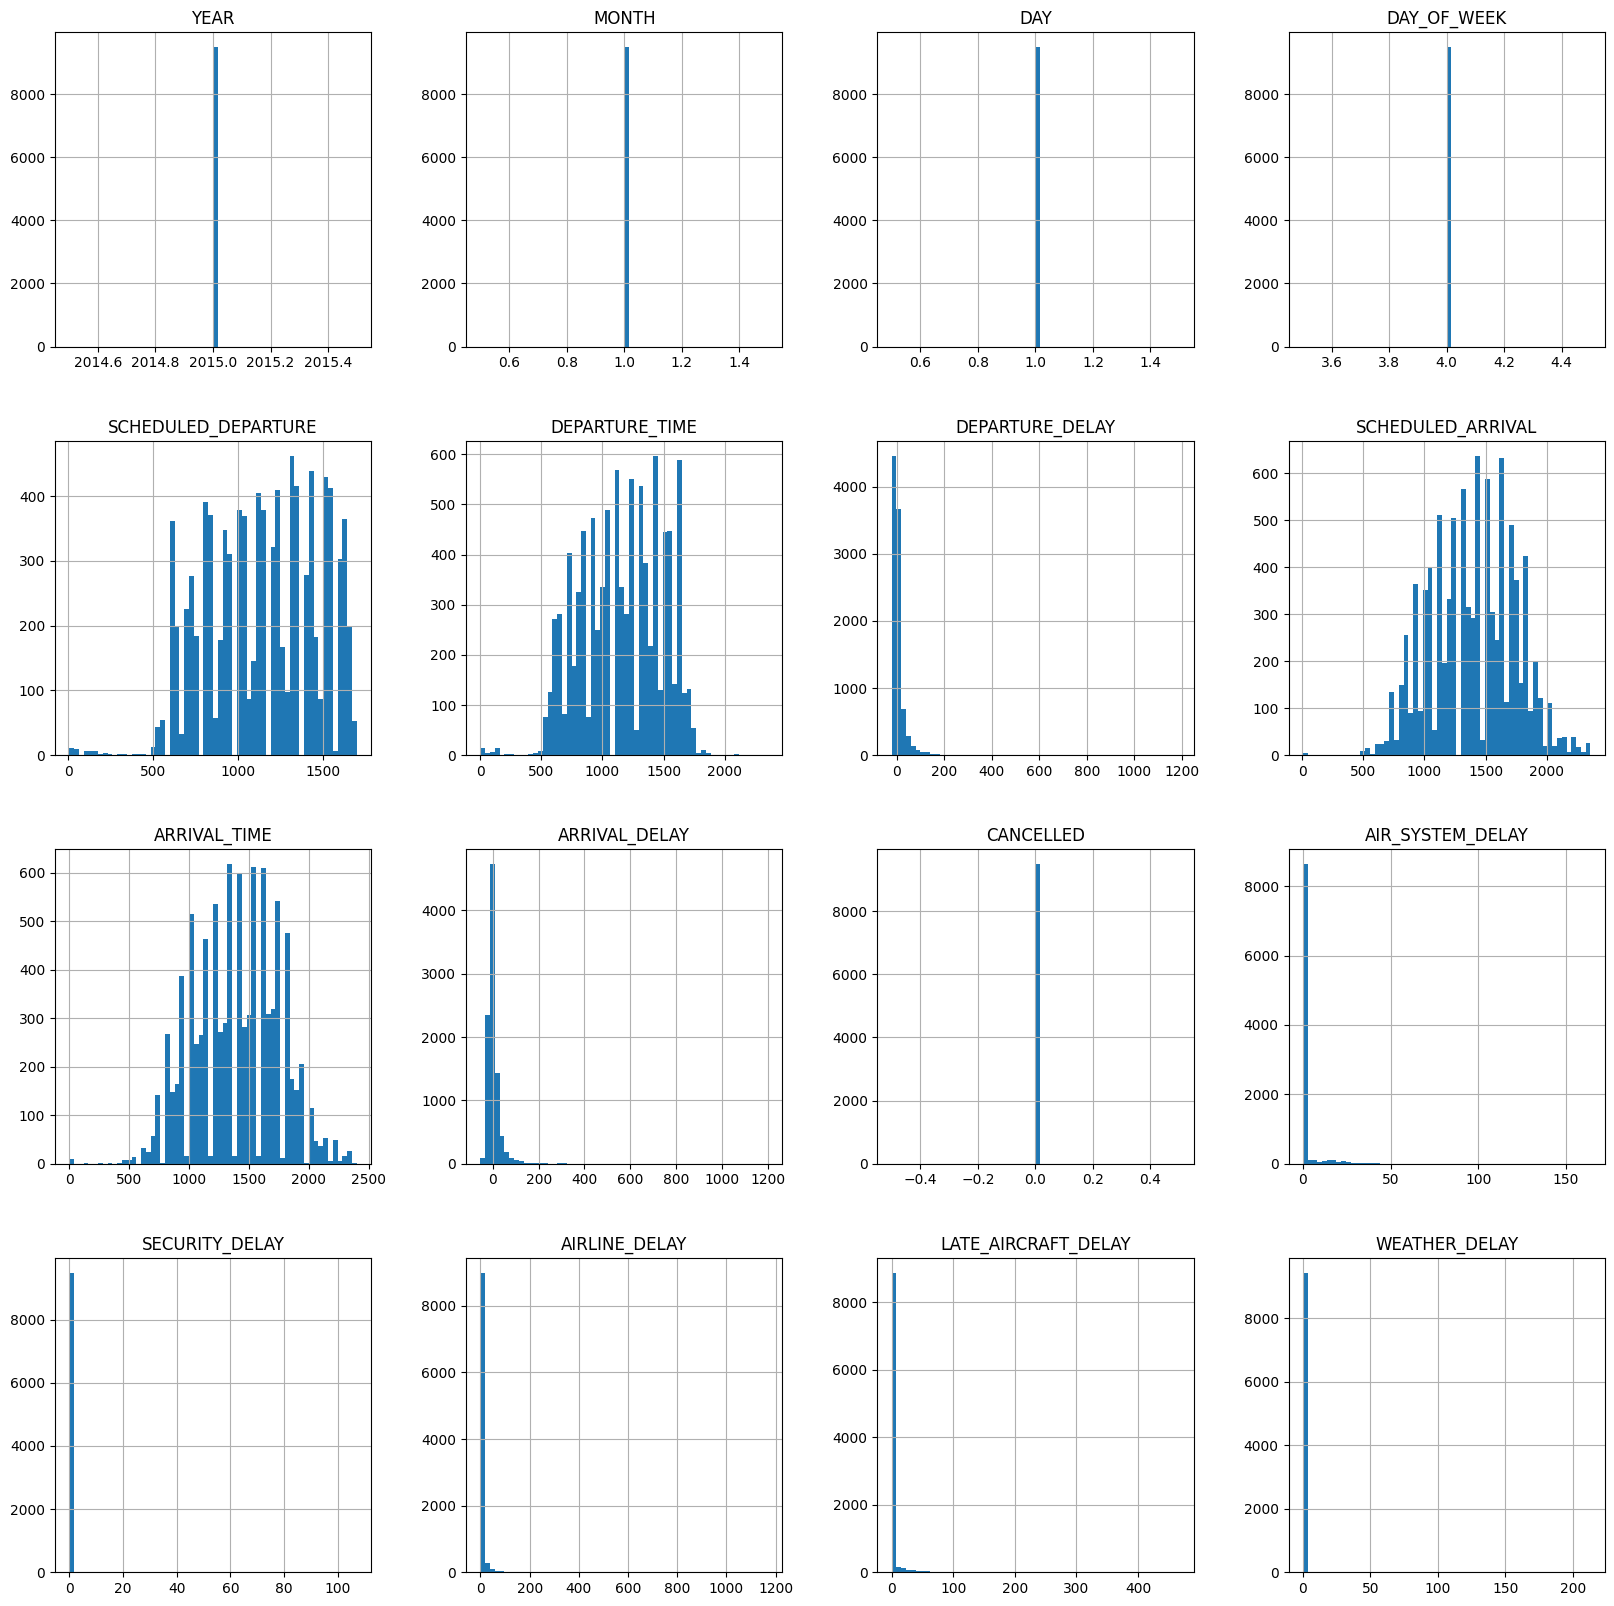

In [46]:
flights.hist(bins=60, figsize=(20,20))

In [48]:
from sklearn.datasets import load_iris
data = load_iris
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups

In [49]:
newsgroups_train

<function sklearn.datasets._twenty_newsgroups.fetch_20newsgroups(*, data_home=None, subset='train', categories=None, shuffle=True, random_state=42, remove=(), download_if_missing=True, return_X_y=False)>

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_flights, y_flights, test_size=0.30, random_state=15)

NameError: ignored